In [1]:
#importing libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import csv

#MACKEY-GLASS TIME SERIES

#variable declaration
tMin = 20
tMax = 650
beta = 0.2
gamma = 0.1
tao = 17

#array initialization with values
xy = np.array([0.401310, 0.953833, 0.174821, 0.572708, 0.971513, 0.109872, 0.388265,
               0.942936, 0.213617, 0.666899, 0.881914, 0.413442, 0.962755, 0.142354,
               0.484694, 0.991570, 0.033185, 0.127373, 0.441263, 0.978804])

#initialising empty array
x1 = []

#appending values into the array
for i in range(0, tMin):
    x1.append(xy[i])

#creating the mackey-glass time series values
for t in range(tMin, tMax):
    mackay = x1[t-1] + (beta * x1[t-tao-1] / (1 + math.pow(x1[t-tao-1], 10))) - (gamma * x1[t-1])
    mackay = round(mackay, 5)
    x1.append(mackay)  

#removing the first 50 values from the array
x1 = x1[50:]

print(x1)

[1.16895, 1.18247, 1.20806, 1.23076, 1.25174, 1.27098, 1.28472, 1.29049, 1.28861, 1.27187, 1.24025, 1.19928, 1.14812, 1.09323, 1.04099, 0.9902, 0.94339, 0.89458, 0.84568, 0.79839, 0.75026, 0.70266, 0.65637, 0.61192, 0.57012, 0.5318, 0.49754, 0.46885, 0.44777, 0.43652, 0.43898, 0.45867, 0.49627, 0.55053, 0.61655, 0.6896, 0.76312, 0.83128, 0.89018, 0.93769, 0.97328, 0.99744, 1.01131, 1.01635, 1.01413, 1.00644, 0.99532, 0.98307, 0.97254, 0.96698, 0.96945, 0.98233, 1.00644, 1.04044, 1.07944, 1.11512, 1.13926, 1.14827, 1.14387, 1.13051, 1.11291, 1.09503, 1.07984, 1.06927, 1.06421, 1.06447, 1.06873, 1.07464, 1.07904, 1.0781, 1.0677, 1.04462, 1.00874, 0.964, 0.91625, 0.87069, 0.83094, 0.79912, 0.77607, 0.76142, 0.75371, 0.75074, 0.75, 0.74924, 0.74692, 0.7426, 0.73707, 0.73244, 0.73219, 0.74099, 0.76338, 0.80092, 0.85015, 0.9044, 0.95761, 1.00633, 1.04951, 1.08748, 1.12105, 1.15101, 1.17791, 1.20205, 1.22357, 1.24253, 1.25903, 1.27338, 1.28627, 1.2988, 1.31198, 1.32527, 1.33476, 1.33369, 1.31

In [2]:
#Reshape array for normalisation and to create model-fit
xArray = np.array(x1)
x1 = xArray.reshape(600,1)
print(x1.shape)
len(x1)

(600, 1)


600

In [3]:
#Assigning 500 values of matrix x1 to numsArray
numsArray = x1[99:(tMax-51)]

#printing shape to see if the desired matrix has been achieved
print("The shape of numsArray:",numsArray.shape, "\n")

#copying values to normArray
normArray = numsArray

# finding the minimum value of normArray
ymin = np.min(normArray)
print("Minimum value:",ymin,"\n")

# finding the maximum value of normArray
ymax = np.max(normArray) 
print("Maximum value:",ymax,"\n")


#Normalisation using min-max
numsArray = 2.0*((normArray-ymin)/(ymax-ymin)-0.5)

#GENERATING LAGS

#transforming the matrix to generate lags in the dataset
lagArray = numsArray.reshape(-1,1)

#input dimension/window size for which-- 
#--one-step ahead prediction needs to be done on dataset
inputDim = 10

#output dimension
outputDim = len(lagArray) - inputDim 
#print("The value of outputDim:",outputDim,"\n")

#intitialising x1 matrix to zeros
x1 = np.zeros((outputDim,inputDim))

#intitialising y1 to zero
y1 = np.zeros(outputDim)

#for-loop to find x1 and y1 values according to input dimension
#to enable one step ahead prediction
for i in range(1, outputDim):
    
    y1[i] = lagArray[i + inputDim]
        
    for j in range(0,inputDim):
        x1[i, j] = lagArray[i-j+inputDim]
    #print(round(y1[i],5))
    
#Choosing the x1 and y1 values that fit perfectly
y1 = y1[2:(outputDim)]
x1 = x1[1:(outputDim-1)]

print("The length of the array x1:",x1.shape,"\n")
print("Length of the array y1:",y1.shape,"\n")

The shape of numsArray: (500, 1) 

Minimum value: 0.37606 

Maximum value: 1.33476 

The length of the array x1: (488, 10) 

Length of the array y1: (488,) 



In [9]:
#SPLIT THE DATA INTO TRAIN AND TEST DATA

#print the length of array x1
print("Print the length of x1:", len(x1))

#TRAINING DATA
#initialize arrays x and y
x = x1[0:(outputDim-100), 0:10]
y = y1[0:(outputDim-100)]

#print the shape of array y
print("Print the shape of y:", y.shape)

#TEST DATA
# initialize array t
t = x1[(outputDim-99):(outputDim-2), 0:10]

#initialize array test-set
y_test = y1[(outputDim-99):(outputDim-2)]

#print the length of arrays x and t
print("The length of x:", len(x), "\nThe length of t:", len(t))

#transpose the array x to create the array newArray
newArray = np.transpose(x)

#print the shape of newArray and arrays x and y
print("The shape of newArray:", newArray.shape)
print("\nThe shape of x:", x.shape)
print("\nThe shape of y:", y.shape)
print("The shape of t:", t.shape)
print("The shape of y_test:", y_test.shape)


#assign y values to variable targets
targets = y

#print the shape of newArray
print('targets shape:', targets.shape)

#initialize variables NHIDDENS and outputVal
NHIDDENS = 5
outputVal = targets

#initialize variables NINPUTS and NPATS
NINPUTS, NPATS = newArray.shape

#print the values of variables NINPUTS and NPATS
print("Value of NINPUTS:", NINPUTS, "\nValue of NPATS:", NPATS)

#initialize variables NP and NOUTPUTS
NP = targets.shape[0]
NOUTPUTS = targets.shape[0]/NP

#print the values of variables NP and NOUTPUTS
print("Value of NP:", NP, "\nValue of NOUTPUTS:", NOUTPUTS)


Print the length of x1: 488
Print the shape of y: (390,)
The length of x: 390 
The length of t: 97
The shape of newArray: (10, 390)

The shape of x: (390, 10)

The shape of y: (390,)
The shape of t: (97, 10)
The shape of y_test: (97,)
targets shape: (390,)
Value of NINPUTS: 10 
Value of NPATS: 390
Value of NP: 390 
Value of NOUTPUTS: 1.0


The shape of input matrix: (11, 390)
Test runs 0: Epoch 99: Error = 3.192073234105424
Test runs 1: Epoch 99: Error = 3.6823900806762833
Test runs 2: Epoch 99: Error = 2.446414252144173
Test runs 3: Epoch 99: Error = 2.505370963491819
Test runs 4: Epoch 99: Error = 2.8074666359037916
Test runs 5: Epoch 99: Error = 2.038228815162555
Test runs 6: Epoch 99: Error = 2.0379837118017834
Test runs 7: Epoch 99: Error = 2.507469248434054
Test runs 8: Epoch 99: Error = 2.323216440607374
Test runs 9: Epoch 99: Error = 2.2143685346986777
Test runs 10: Epoch 99: Error = 2.598166495901567
Test runs 11: Epoch 99: Error = 3.0456775240255904
Test runs 12: Epoch 99: Error = 2.4005423075412207
Test runs 13: Epoch 99: Error = 3.0424720295781844
Test runs 14: Epoch 99: Error = 3.0429707939726813
Test runs 15: Epoch 99: Error = 2.082385458113693
Test runs 16: Epoch 99: Error = 2.29920393267287
Test runs 17: Epoch 99: Error = 2.0584248831045624
Test runs 18: Epoch 99: Error = 2.424484985166659
Test runs 19: E

Test runs 164: Epoch 99: Error = 2.0310088028725968
Test runs 165: Epoch 99: Error = 3.1569038771485554
Test runs 166: Epoch 99: Error = 1.7307616544751365
Test runs 167: Epoch 99: Error = 2.4196027570990557
Test runs 168: Epoch 99: Error = 2.33730513876438
Test runs 169: Epoch 99: Error = 2.4788948519184495
Test runs 170: Epoch 99: Error = 3.3375973117176057
Test runs 171: Epoch 99: Error = 2.6879969776391515
Test runs 172: Epoch 99: Error = 2.2786731609178235
Test runs 173: Epoch 99: Error = 2.121836900793623
Test runs 174: Epoch 99: Error = 1.6491139694580936
Test runs 175: Epoch 99: Error = 2.334507061461328
Test runs 176: Epoch 99: Error = 3.307776117114731
Test runs 177: Epoch 99: Error = 2.7410268838158074
Test runs 178: Epoch 99: Error = 1.9927806011980327
Test runs 179: Epoch 99: Error = 2.945243546612612
Test runs 180: Epoch 99: Error = 2.2092359306465603
Test runs 181: Epoch 99: Error = 2.379783565377666
Test runs 182: Epoch 99: Error = 1.888109097732415
Test runs 183: Epoch

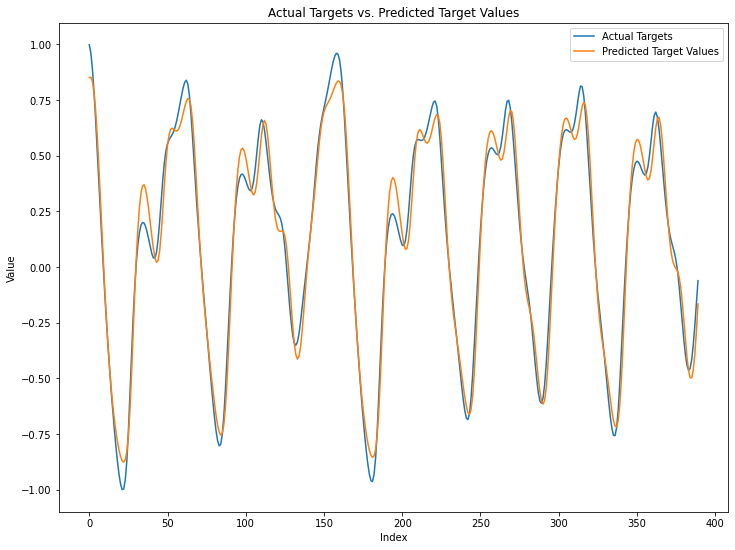

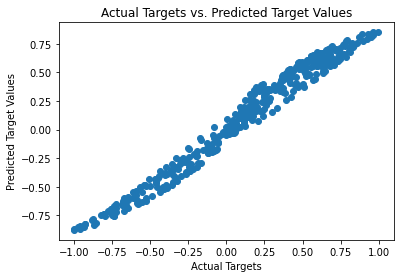

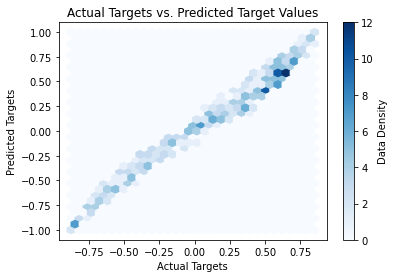

In [12]:
#Learning rate
eta = 0.001
#target error
L = 0.02
# set the number of epochs
epochs = 100
# initialize the best SSE to infinity
best_sse = np.inf
#make input matrix
inputs = np.concatenate((newArray, np.ones((1, NPATS))), axis=0)
print("The shape of input matrix:", inputs.shape)

for i in range (1):
    
    #using the random seed function
    #find best weights corresponding to each test run
    np.random.seed(103)
    
    #weight matrix w1 & w2
    w1 = 0.5 * (np.random.rand(NHIDDENS, NINPUTS+1) - 0.5)
    w2 = 0.5 * (np.random.rand(1, NHIDDENS+1) - 0.5)       
    for epoch in range(epochs):
        
        w1_copy = np.copy(w1)
        w2_copy = np.copy(w2)
        
        # Forward propagation
        sum1 = np.matmul(w1_copy, inputs) 
        
        #finding hidden node value by calculating tanh of the output
        hidden = np.tanh(sum1)
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2_copy, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        #assigning vlaues to variables to use later
        out = sum2 
        outputVal = out
        
        #Backpropagation of errors
        error = targets - out 
        
        #sum squared error
        sse = np.sum(np.sum((error**2)))
        bout = error 
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bp = np.dot(w2.T, bout) 
        
        #computing the error at the hidden layer
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
            
        # Updating the weights:
        w2 = w2_copy + eta*dW2
        w1 = w1_copy + eta*dW1
        
        #store the best sse to find the best weights 
        if sse < best_sse:
            best_sse = sse
            best_weights = (w1_copy, w2_copy)
            
    # print the SSE for this test run
    print(f'Test runs {i}: Epoch {epoch}: Error = {sse}')
    
    
print("\n\n",f'Best SSE = {best_sse}',"\n")
print(f'Best weights:',"\n")
print(f'w1 = {best_weights[0]}',"\n\n")
print(f'w2 = {best_weights[1]}')
print("The shape of W1 weight matrix:", w1.shape)
print("The shape of W2 weight matrix:", w2.shape)


# Forward propagation using the best weights
#sum1_best = np.matmul(w1, inputs)
#hidden_best = np.tanh(sum1_best)
#sum2_best = np.dot(w2, np.concatenate((hidden_best, np.ones((1, NPATS))), axis=0))

#PREDICTIONS ON THE TRAINING DATA
predictions = outputVal

# Flatten the predictions array to 1D to plot using Matplotlib
flat_predictions = predictions.ravel()

# Create a line plot for both actual targets and predicted targets
plt.figure(figsize=(12, 9))
plt.plot(targets, label='Actual Targets')
plt.plot(flat_predictions, label='Predicted Target Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Targets vs. Predicted Target Values')
plt.legend()
plt.show()

#Scatter Plot
plt.title('Actual Targets vs. Predicted Target Values')
plt.scatter(targets, flat_predictions)
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Target Values')
plt.show()

# Create a hexbin plot
plt.hexbin(flat_predictions, targets, gridsize=30, cmap='Blues')
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Actual Targets vs. Predicted Target Values')
plt.colorbar(label='Data Density')
plt.show()


(11, 97)
(5, 97)
(1, 97)
Shape of outputVal: (1, 97)
Shape of predictions: (97,)


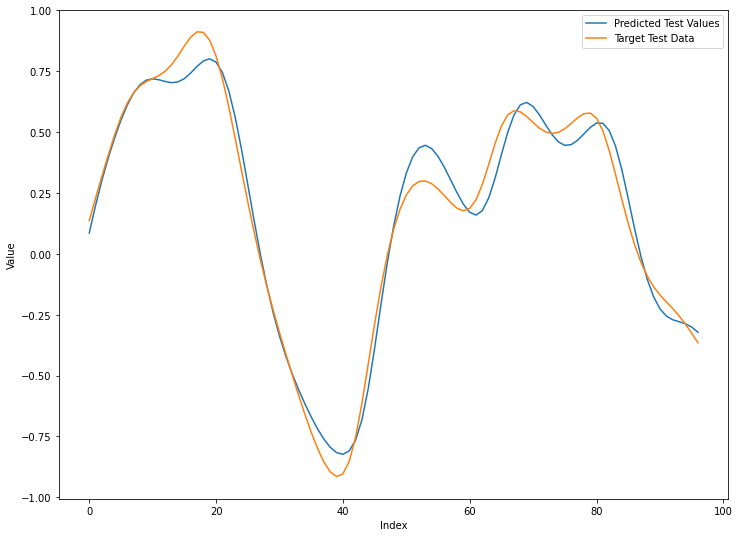

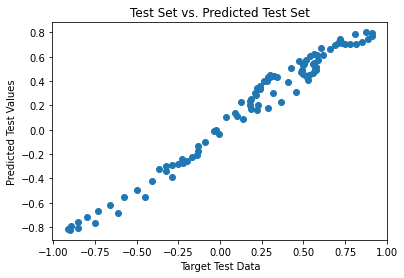

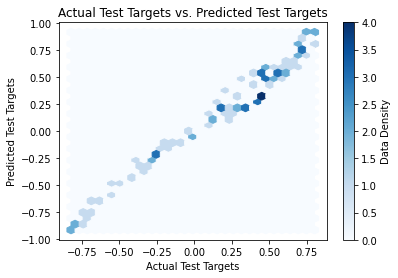

In [13]:
#Forecast the data
#forward propogation with the best weights
testinputs = np.concatenate((t.T, np.ones((1, t.shape[0]))), axis=0)
print(testinputs.shape)
sum1 = np.matmul(w1, testinputs) 
print(sum1.shape)
hidden = np.tanh(sum1)
sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, t.shape[0]))), axis=0))
print(sum2.shape)
out = sum2 
outputVal = out
print("Shape of outputVal:",outputVal.shape)

#Flatten outputVal dataset to 1DArray to visualize the data
predictions = outputVal.ravel()
print("Shape of predictions:",predictions.shape)
#Plot graph
plt.figure(figsize=(12, 9))
plt.plot(range(len(predictions)), predictions, label='Predicted Test Values')
plt.plot(range(len(y_test)), y_test, label='Target Test Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
#Scatter Plot
plt.title('Test Set vs. Predicted Test Set')
plt.scatter(y_test, predictions)
plt.xlabel('Target Test Data')
plt.ylabel('Predicted Test Values')
plt.show()
# Create a hexbin plot
plt.hexbin(predictions, y_test, gridsize=30, cmap='Blues')
plt.xlabel('Actual Test Targets')
plt.ylabel('Predicted Test Targets')
plt.title('Actual Test Targets vs. Predicted Test Targets')
plt.colorbar(label='Data Density')
plt.show()
